In [445]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [446]:
# Combining train and test data set

train_df= pd.read_csv("..\Dataset\power-laws-forecasting-energy-consumption-training-data.csv",sep=';')
test_df=pd.read_csv("..\Dataset\power-laws-forecasting-energy-consumption-test-data.csv",sep=';')

In [447]:
combined_df = pd.concat([train_df, test_df], ignore_index=True)

In [448]:
combined_df.head()

,obs_id,SiteId,Timestamp,ForecastId,Value
0,4852050,42,2016-10-18T02:45:00+00:00,1087,26397.049623
1,1638923,42,2016-10-18T11:45:00+00:00,1087,42958.364641
2,5748910,42,2016-10-18T20:45:00+00:00,1087,27096.919666
3,38199,42,2016-10-20T10:45:00+00:00,1087,50211.408087
4,1338204,42,2016-10-20T18:45:00+00:00,1087,50503.305105


In [449]:
new = combined_df.groupby('SiteId')['Value'].count()

# Filter to get SiteIds with counts greater than 100,000
filtered_new = new[new > 100000]

# Display the first 250 entries
filtered_new

SiteId
6      167358
8      137704
9      110166
14     109790
22     103727
33     114888
121    109327
122    106887
123    109083
190    118534
232    110286
233    122511
235    122592
237    144433
261    184713
269    151565
271    149262
276    122434
287    100275
298    108215
302    268160
Name: Value, dtype: int64

In [450]:
## Taking only site id 2

new_df_2=combined_df.loc[combined_df['SiteId']==2,['Timestamp','Value']]
# Converting hourly data values into daily data points

new_df_2['Timestamp'] = pd.to_datetime(new_df_2['Timestamp'])

# Setting the 'Timestamp' as the index
new_df_2.set_index('Timestamp', inplace=True)

# Resampling to daily frequency and summing up the energy consumption
daily_energy_2 = new_df_2['Value'].resample('D').median()

# Resetting the index to get a clean DataFrame
daily_energy_df_2 = daily_energy_2.reset_index()
print("Site id 2")
print(daily_energy_df_2)

##Taking Siteid 6

new_df_6=combined_df.loc[combined_df['SiteId']==6,['Timestamp','Value']]
# Converting hourly data values into daily data points

new_df_6['Timestamp'] = pd.to_datetime(new_df_6['Timestamp'])

# Setting the 'Timestamp' as the index
new_df_6.set_index('Timestamp', inplace=True)

# Resampling to daily frequency and summing up the energy consumption
daily_energy_6 = new_df_6['Value'].resample('D').median()

# Resetting the index to get a clean DataFrame
daily_energy_df_6 = daily_energy_6.reset_index()
print("Site Id 6")
print(daily_energy_df_6)

## Taking Siteid 8

new_df_8=combined_df.loc[combined_df['SiteId']==8,['Timestamp','Value']]
# Converting hourly data values into daily data points

new_df_8['Timestamp'] = pd.to_datetime(new_df_8['Timestamp'])

# Setting the 'Timestamp' as the index
new_df_8.set_index('Timestamp', inplace=True)

# Resampling to daily frequency and summing up the energy consumption
daily_energy_8 = new_df_8['Value'].resample('D').median()

# Resetting the index to get a clean DataFrame
daily_energy_df_8 = daily_energy_8.reset_index()
print("Site Id 8")
print(daily_energy_df_8)

##Taking Siteid 261

new_df_261=combined_df.loc[combined_df['SiteId']==261,['Timestamp','Value']]
# Converting hourly data values into daily data points

new_df_261['Timestamp'] = pd.to_datetime(new_df_261['Timestamp'])

# Setting the 'Timestamp' as the index
new_df_261.set_index('Timestamp', inplace=True)

# Resampling to daily frequency and summing up the energy consumption
daily_energy_261 = new_df_261['Value'].resample('D').median()

# Resetting the index to get a clean DataFrame
daily_energy_df_261 = daily_energy_261.reset_index()
print("Site Id 261")
print(daily_energy_df_261)





Site id 2
                     Timestamp         Value
0    2013-01-01 00:00:00+00:00  36684.061000
1    2013-01-02 00:00:00+00:00  42862.147280
2    2013-01-03 00:00:00+00:00  34146.646910
3    2013-01-04 00:00:00+00:00  33513.751672
4    2013-01-05 00:00:00+00:00  37022.648021
...                        ...           ...
1729 2017-09-26 00:00:00+00:00  40758.108669
1730 2017-09-27 00:00:00+00:00  46063.478285
1731 2017-09-28 00:00:00+00:00  50619.422517
1732 2017-09-29 00:00:00+00:00  42733.022864
1733 2017-09-30 00:00:00+00:00  25654.529129

[1734 rows x 2 columns]
Site Id 6
                     Timestamp         Value
0    2013-01-01 00:00:00+00:00  24865.164878
1    2013-01-02 00:00:00+00:00  24980.978408
2    2013-01-03 00:00:00+00:00  24158.702345
3    2013-01-04 00:00:00+00:00  24911.490290
4    2013-01-05 00:00:00+00:00  22213.035042
...                        ...           ...
1754 2017-10-21 00:00:00+00:00  15935.941719
1755 2017-10-22 00:00:00+00:00  16167.568779
1756 2017-

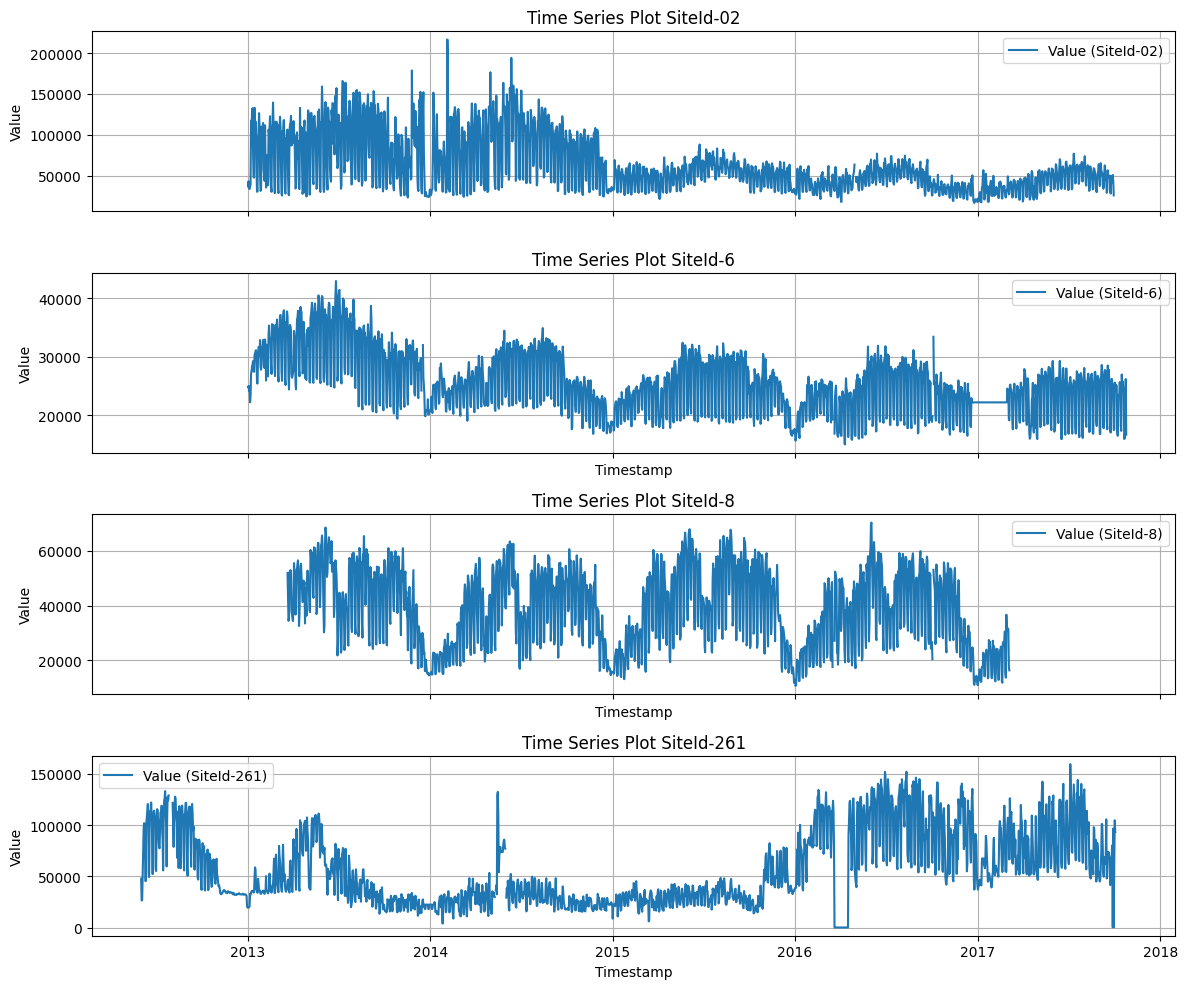

In [451]:
# # Plot the time series
# plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
# plt.plot(daily_energy_df_2['Timestamp'], daily_energy_df_2['Value'], label='Value')

# # Formatting the plot
# plt.title('Time Series Plot SiteId-02')
# plt.xlabel('Timestamp')
# plt.ylabel('Value')
# plt.grid(True)
# plt.legend()

# # Display the plot
# plt.show()


fig, ax = plt.subplots(4, 1, figsize=(12, 10), sharex=True)  # 4 rows, 1 column of subplots

# Subplot for SiteId-02
ax[0].plot(daily_energy_df_2['Timestamp'], daily_energy_df_2['Value'], label='Value (SiteId-02)')
ax[0].set_title('Time Series Plot SiteId-02')
ax[0].set_ylabel('Value')
ax[0].grid(True)
ax[0].legend()

# Subplot for SiteId-6
ax[1].plot(daily_energy_df_6['Timestamp'], daily_energy_df_6['Value'], label='Value (SiteId-6)')
ax[1].set_title('Time Series Plot SiteId-6')
ax[1].set_xlabel('Timestamp')
ax[1].set_ylabel('Value')
ax[1].grid(True)
ax[1].legend()

# Subplot for SiteId-261
ax[3].plot(daily_energy_df_261['Timestamp'], daily_energy_df_261['Value'], label='Value (SiteId-261)')
ax[3].set_title('Time Series Plot SiteId-261')
ax[3].set_xlabel('Timestamp')
ax[3].set_ylabel('Value')
ax[3].grid(True)
ax[3].legend()

# Subplot for SiteId-8
ax[2].plot(daily_energy_df_8['Timestamp'], daily_energy_df_8['Value'], label='Value (SiteId-8)')
ax[2].set_title('Time Series Plot SiteId-8')
ax[2].set_xlabel('Timestamp')
ax[2].set_ylabel('Value')
ax[2].grid(True)
ax[2].legend()

# Formatting the layout
plt.tight_layout()

# Display the plot
plt.show()


In [452]:
# Filter for the years 2016 and 2017
df_2014_2015_2 = daily_energy_df_2[daily_energy_df_2['Timestamp'].dt.year.isin([2014, 2015])]
df_2014_2015_6 = daily_energy_df_6[daily_energy_df_6['Timestamp'].dt.year.isin([2014, 2015])]
df_2014_2015_8 = daily_energy_df_8[daily_energy_df_8['Timestamp'].dt.year.isin([2014, 2015])]
df_2014_2015_261 = daily_energy_df_261[daily_energy_df_261['Timestamp'].dt.year.isin([2014, 2015])]


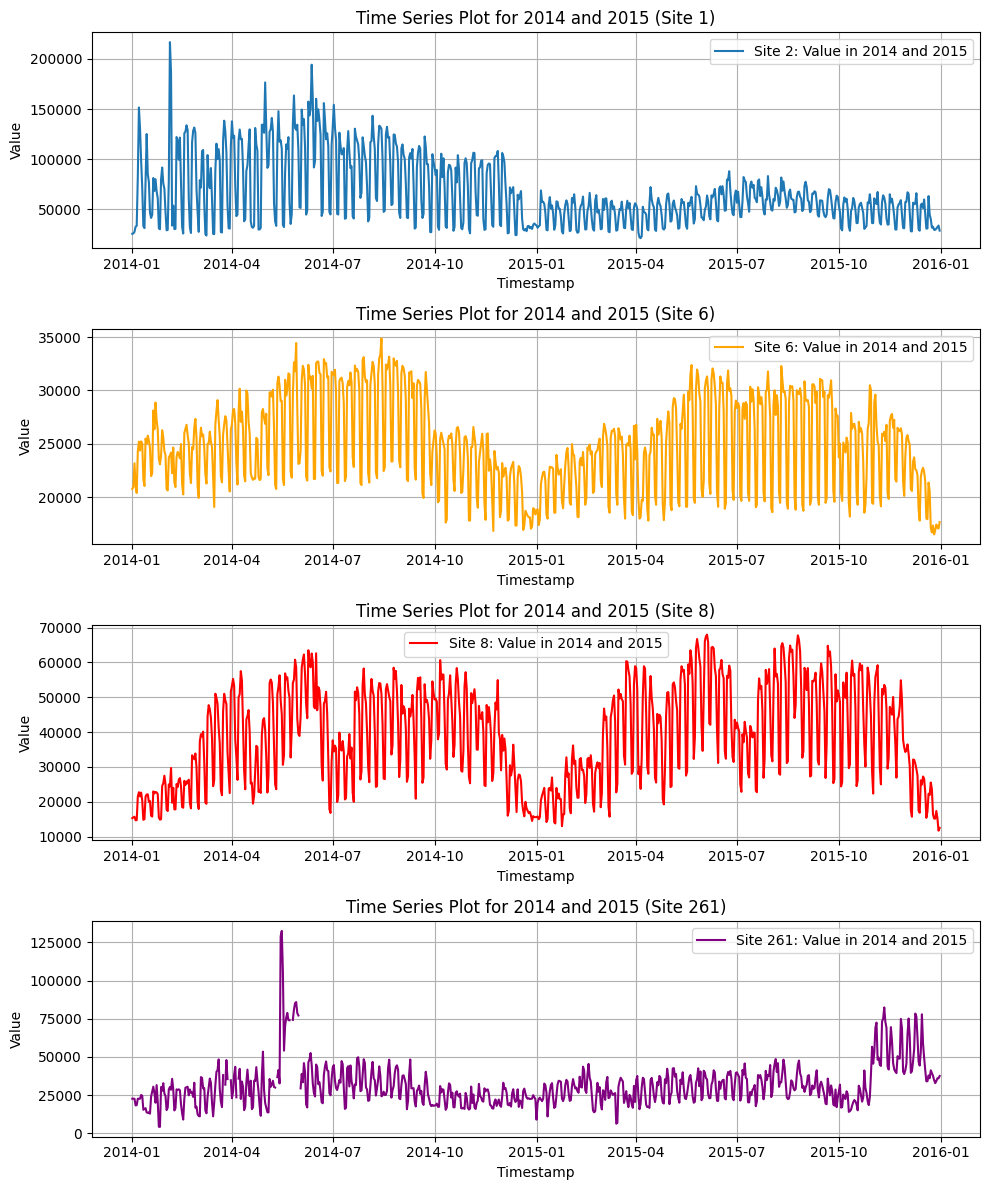

In [453]:
# import matplotlib.pyplot as plt

# # Plot the time series for the years 2016 and 2017
# plt.figure(figsize=(10, 6))
# plt.plot(df_2016_2017_2['Timestamp'], df_2016_2017_2['Value'], label='Value in 2016 and 2017')

# # Formatting the plot
# plt.title('Time Series Plot for 2016 and 2017')
# plt.xlabel('Timestamp')
# plt.ylabel('Value')
# plt.grid(True)
# plt.legend()

# # Display the plot
# plt.show()

# Create a figure and two subplots
fig, axs = plt.subplots(4, 1, figsize=(10, 12))

# Plot the time series for the first site on the first subplot
axs[0].plot(df_2014_2015_2['Timestamp'], df_2014_2015_2['Value'], label='Site 2: Value in 2014 and 2015')
axs[0].set_title('Time Series Plot for 2014 and 2015 (Site 1)')
axs[0].set_xlabel('Timestamp')
axs[0].set_ylabel('Value')
axs[0].grid(True)
axs[0].legend()

# Plot the time series for the second site on the second subplot
axs[1].plot(df_2014_2015_6['Timestamp'], df_2014_2015_6['Value'], label='Site 6: Value in 2014 and 2015', color='orange')
axs[1].set_title('Time Series Plot for 2014 and 2015 (Site 6)')
axs[1].set_xlabel('Timestamp')
axs[1].set_ylabel('Value')
axs[1].grid(True)
axs[1].legend()

# Plot the time series for the second site on the third subplot
axs[2].plot(df_2014_2015_8['Timestamp'], df_2014_2015_8['Value'], label='Site 8: Value in 2014 and 2015', color='red')
axs[2].set_title('Time Series Plot for 2014 and 2015 (Site 8)')
axs[2].set_xlabel('Timestamp')
axs[2].set_ylabel('Value')
axs[2].grid(True)
axs[2].legend()

# Plot the time series for the second site on the forth subplot
axs[3].plot(df_2014_2015_261['Timestamp'], df_2014_2015_261['Value'], label='Site 261: Value in 2014 and 2015', color='purple')
axs[3].set_title('Time Series Plot for 2014 and 2015 (Site 261)')
axs[3].set_xlabel('Timestamp')
axs[3].set_ylabel('Value')
axs[3].grid(True)
axs[3].legend()

# Adjust layout to avoid overlap
plt.tight_layout()

# Display the plot
plt.show()



In [454]:
## geting weather dataset

weather_data=pd.read_csv("..\Dataset\power-laws-forecasting-energy-consumption-weather.csv",sep=';')
weather_data.head()

,Timestamp,Temperature,Distance,SiteId
0,2017-03-03T19:00:00+00:00,10.6,27.489346,51
1,2017-03-03T19:20:00+00:00,11.0,28.663082,51
2,2017-03-03T20:00:00+00:00,6.3,28.307039,51
3,2017-03-03T21:55:00+00:00,10.0,29.797449,51
4,2017-03-03T23:00:00+00:00,5.4,28.307039,51


In [455]:
# Filter the weather data for each specific SiteId
weather_data_s2 = weather_data.loc[weather_data['SiteId'] == 2, ['Timestamp', 'Temperature']]
weather_data_s6 = weather_data.loc[weather_data['SiteId'] == 6, ['Timestamp', 'Temperature']]
weather_data_s8 = weather_data.loc[weather_data['SiteId'] == 8, ['Timestamp', 'Temperature']]




In [456]:
### Site Id 2
# Converting hourly data values into daily data points
weather_data_s2['Timestamp'] = pd.to_datetime(weather_data_s2['Timestamp'])
# Setting the 'Timestamp' as the index
weather_data_s2.set_index('Timestamp', inplace=True)
# Resampling to daily frequency and summing up the energy consumption
daily_weather_2 = weather_data_s2['Temperature'].resample('D').median()
# Resetting the index to get a clean DataFrame
daily_weather_df_2 = daily_weather_2.reset_index()
print("Daily Weather Data Site 2")
print(daily_weather_df_2)

##Site Id 6
weather_data_s6['Timestamp'] = pd.to_datetime(weather_data_s6['Timestamp'])
weather_data_s6.set_index('Timestamp', inplace=True)
daily_weather_6 = weather_data_s6['Temperature'].resample('D').median()
daily_weather_df_6 = daily_weather_6.reset_index()
print("Daily Weather Data Site 6")
print(daily_weather_df_6)

###Site Id 8
weather_data_s8['Timestamp'] = pd.to_datetime(weather_data_s8['Timestamp'])
weather_data_s8.set_index('Timestamp', inplace=True)
daily_weather_8 = weather_data_s8['Temperature'].resample('D').median()
daily_weather_df_8 = daily_weather_8.reset_index()
print("Daily Weather Data Site 8")
print(daily_weather_df_8)

###Site Id 261

daily_weather_261 = weather_data_s6['Temperature'].resample('D').median()
daily_weather_df_261 = daily_weather_261.reset_index()
print("Daily Weather Data Site 6")
print(daily_weather_df_261)

Daily Weather Data Site 2
                     Timestamp  Temperature
0    2013-01-01 00:00:00+00:00        21.70
1    2013-01-02 00:00:00+00:00        20.00
2    2013-01-03 00:00:00+00:00        17.00
3    2013-01-04 00:00:00+00:00        17.00
4    2013-01-05 00:00:00+00:00        18.50
...                        ...          ...
1821 2017-12-27 00:00:00+00:00        18.00
1822 2017-12-28 00:00:00+00:00        17.00
1823 2017-12-29 00:00:00+00:00        18.15
1824 2017-12-30 00:00:00+00:00        19.00
1825 2017-12-31 00:00:00+00:00        16.00

[1826 rows x 2 columns]
Daily Weather Data Site 6
                     Timestamp  Temperature
0    2013-01-01 00:00:00+00:00        21.70
1    2013-01-02 00:00:00+00:00        20.00
2    2013-01-03 00:00:00+00:00        17.00
3    2013-01-04 00:00:00+00:00        17.00
4    2013-01-05 00:00:00+00:00        18.50
...                        ...          ...
1821 2017-12-27 00:00:00+00:00        18.00
1822 2017-12-28 00:00:00+00:00        17.00

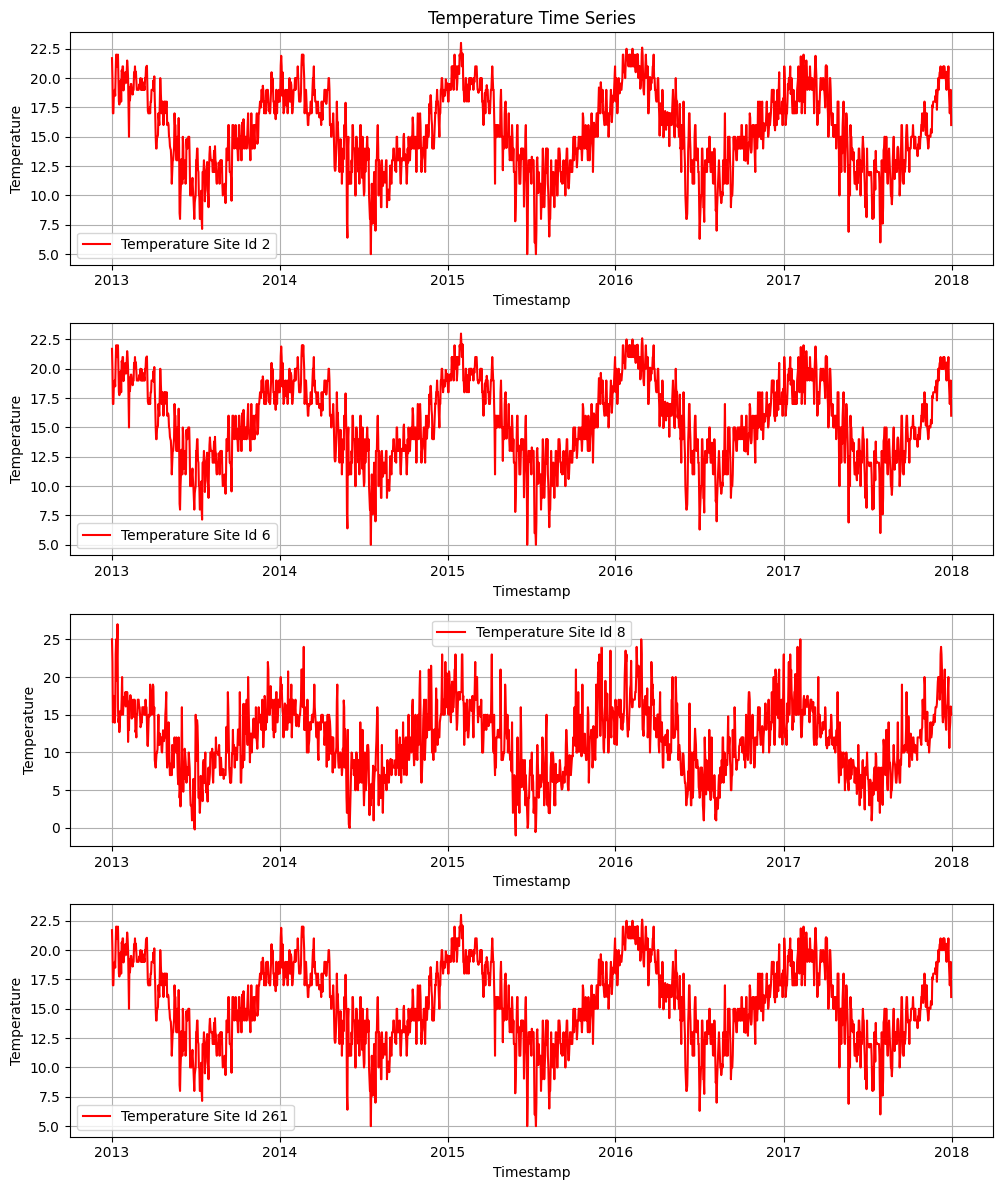

In [457]:
# # Plot the time series
# plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
# plt.plot(daily_weather_df_6['Timestamp'], daily_weather_df_6['Temperature'], label='Temperature')

# # Formatting the plot
# plt.title('Time Series Plot')
# plt.xlabel('Timestamp')
# plt.ylabel('Temperature')
# plt.grid(True)
# plt.legend()

# # Display the plot
# plt.show()


fig, ax1 = plt.subplots(4, 1, figsize=(10, 12))
# First subplot: : Energy Consumption (using SiteId 2)
ax1[0].plot(daily_weather_df_2['Timestamp'], daily_weather_df_2['Temperature'], label='Temperature Site Id 2', color='red')
ax1[0].set_title('Temperature Time Series')
ax1[0].set_xlabel('Timestamp')
ax1[0].set_ylabel('Temperature')
ax1[0].grid(True)
ax1[0].legend()

# Second subplot: Energy Consumption (using SiteId 6)
ax1[1].plot(daily_weather_df_6['Timestamp'], daily_weather_df_6['Temperature'], label='Temperature Site Id 6', color='red')
ax1[1].set_xlabel('Timestamp')
ax1[1].set_ylabel('Temperature')
ax1[1].grid(True)
ax1[1].legend()

# Third subplot: Energy Consumption (using SiteId 8)
ax1[2].plot(daily_weather_df_8['Timestamp'], daily_weather_df_8['Temperature'], label='Temperature Site Id 8', color='red')
ax1[2].set_xlabel('Timestamp')
ax1[2].set_ylabel('Temperature')
ax1[2].grid(True)
ax1[2].legend()

# Forth subplot: Energy Consumption (using SiteId 261)
ax1[3].plot(daily_weather_df_261['Timestamp'], daily_weather_df_261['Temperature'], label='Temperature Site Id 261', color='red')
ax1[3].set_xlabel('Timestamp')
ax1[3].set_ylabel('Temperature')
ax1[3].grid(True)
ax1[3].legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()


In [458]:
# Joining Energy consumption and Weather data

consumption_data=pd.merge(daily_energy_df_2,daily_weather_df_2, on=['Timestamp'])

In [459]:
consumption_data

,Timestamp,Value,Temperature
0,2013-01-01 00:00:00+00:00,36684.061000,21.7
1,2013-01-02 00:00:00+00:00,42862.147280,20.0
2,2013-01-03 00:00:00+00:00,34146.646910,17.0
3,2013-01-04 00:00:00+00:00,33513.751672,17.0
4,2013-01-05 00:00:00+00:00,37022.648021,18.5
...,...,...,...
1729,2017-09-26 00:00:00+00:00,40758.108669,16.0
1730,2017-09-27 00:00:00+00:00,46063.478285,14.8
1731,2017-09-28 00:00:00+00:00,50619.422517,14.0
1732,2017-09-29 00:00:00+00:00,42733.022864,13.8


In [460]:
# Create a new 'Date' column by extracting the date part from the 'Timestamp' column
consumption_data['Date'] = consumption_data['Timestamp'].dt.date

In [461]:
consumption_data.head()

,Timestamp,Value,Temperature,Date
0,2013-01-01 00:00:00+00:00,36684.061000,21.7,2013-01-01
1,2013-01-02 00:00:00+00:00,42862.147280,20.0,2013-01-02
2,2013-01-03 00:00:00+00:00,34146.646910,17.0,2013-01-03
3,2013-01-04 00:00:00+00:00,33513.751672,17.0,2013-01-04
4,2013-01-05 00:00:00+00:00,37022.648021,18.5,2013-01-05


In [462]:
#Holiday Dataset

holiday_df = pd.read_csv(r"..\Dataset\power-laws-forecasting-energy-consumption-holidays.csv" ,delimiter=';')


In [463]:
holiday_df

,Date,Holiday,SiteId
0,2016-02-15,Washington's Birthday,1
1,2017-05-29,Memorial Day,1
2,2017-11-23,Thanksgiving Day,1
3,2017-12-29,New Years Eve Shift,1
4,2017-12-31,New Years Eve,1
...,...,...,...
8382,2015-12-26,Boxing Day,303
8383,2016-05-01,International Workers' Day,304
8384,2015-04-25,Liberation Day,304
8385,2016-03-28,Easter Monday,305


In [464]:
holiday_df['SiteId'].unique()

array([  1,  12,  13,  14,  15,  16,  17,  18,  20,  21,  22,  23,  25,
        26,  27,  32,  33,  34,  39,  40,  42,  43,  44,  45,  47,  48,
        49,  50,  51,  52,  53,  54,  57,  58,  59,  60,  62,  63,  64,
        65,  66,  67,  68,  72,  74,  75,  77,  78,  83,  85,  86,  87,
        88,  90,  93,  94,  96,  98,  99, 100, 101, 102, 105, 106, 107,
       108, 109, 110, 111, 112, 115, 116, 117, 119, 120, 121, 122, 123,
       124, 125, 126, 127, 128, 129, 130, 131, 132, 134, 135, 139, 140,
       141, 142, 143, 145, 146, 148, 149, 150, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 167, 169, 170, 171,
       172, 173, 174, 176, 178, 180, 181, 182, 184, 185, 186, 189, 190,
       192, 193, 194, 195, 196, 197, 199, 200, 201, 202, 203, 204, 205,
       206, 207, 208, 209, 210, 211, 212, 213, 216, 217, 218, 221, 222,
       223, 224, 226, 227, 228, 229, 230, 231, 237, 238, 239, 241, 243,
       246, 247, 248, 250, 251, 252, 253, 254, 255, 256, 257, 25

In [465]:
holiday_count=holiday_df.groupby('SiteId')['Holiday'].count()
holiday_count

SiteId
1       62
12      25
13      52
14      56
15      41
      ... 
301    108
302    108
303    108
304     33
305     33
Name: Holiday, Length: 227, dtype: int64

In [466]:
holiday_data=holiday_df.loc[holiday_df['SiteId']==301]
holiday_data.drop(columns=['SiteId'],inplace=True)
holiday_data

C:\Users\melbi\AppData\Local\Temp\ipykernel_17984\1779299735.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  holiday_data.drop(columns=['SiteId'],inplace=True)


,Date,Holiday
504,2017-12-26,Boxing Day
505,2009-04-10,Good Friday
506,2010-01-02,Berchtold's Day
507,2011-04-22,Good Friday
508,2012-05-17,Ascension Thursday
...,...,...
8359,2013-01-01,New year
8360,2013-05-20,Whit Monday
8361,2014-01-02,Berchtold's Day
8362,2015-04-06,Easter Monday


In [467]:
# Convert the 'Date' columns to datetime
consumption_data['Date'] = pd.to_datetime(consumption_data['Date'])
holiday_data['Date'] = pd.to_datetime(holiday_data['Date'])

# Merge the two datasets on 'Date'
merged_df = pd.merge(consumption_data, holiday_data, on='Date', how='left')
merged_df

C:\Users\melbi\AppData\Local\Temp\ipykernel_17984\4007679168.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  holiday_data['Date'] = pd.to_datetime(holiday_data['Date'])


,Timestamp,Value,Temperature,Date,Holiday
0,2013-01-01 00:00:00+00:00,36684.061000,21.7,2013-01-01,New year
1,2013-01-02 00:00:00+00:00,42862.147280,20.0,2013-01-02,Berchtold's Day
2,2013-01-03 00:00:00+00:00,34146.646910,17.0,2013-01-03,NaN
3,2013-01-04 00:00:00+00:00,33513.751672,17.0,2013-01-04,NaN
4,2013-01-05 00:00:00+00:00,37022.648021,18.5,2013-01-05,NaN
...,...,...,...,...,...
1729,2017-09-26 00:00:00+00:00,40758.108669,16.0,2017-09-26,NaN
1730,2017-09-27 00:00:00+00:00,46063.478285,14.8,2017-09-27,NaN
1731,2017-09-28 00:00:00+00:00,50619.422517,14.0,2017-09-28,NaN
1732,2017-09-29 00:00:00+00:00,42733.022864,13.8,2017-09-29,NaN


In [468]:
merged_df['Holiday']=merged_df['Holiday'].fillna('Working Day')
merged_df

,Timestamp,Value,Temperature,Date,Holiday
0,2013-01-01 00:00:00+00:00,36684.061000,21.7,2013-01-01,New year
1,2013-01-02 00:00:00+00:00,42862.147280,20.0,2013-01-02,Berchtold's Day
2,2013-01-03 00:00:00+00:00,34146.646910,17.0,2013-01-03,Working Day
3,2013-01-04 00:00:00+00:00,33513.751672,17.0,2013-01-04,Working Day
4,2013-01-05 00:00:00+00:00,37022.648021,18.5,2013-01-05,Working Day
...,...,...,...,...,...
1729,2017-09-26 00:00:00+00:00,40758.108669,16.0,2017-09-26,Working Day
1730,2017-09-27 00:00:00+00:00,46063.478285,14.8,2017-09-27,Working Day
1731,2017-09-28 00:00:00+00:00,50619.422517,14.0,2017-09-28,Working Day
1732,2017-09-29 00:00:00+00:00,42733.022864,13.8,2017-09-29,Working Day


In [469]:
merged_df['Year']=merged_df['Date'].dt.year
merged_df['Month']=merged_df['Date'].dt.month
merged_df['Day']=merged_df['Date'].dt.day
merged_df

,Timestamp,Value,Temperature,Date,Holiday,Year,Month,Day
0,2013-01-01 00:00:00+00:00,36684.061000,21.7,2013-01-01,New year,2013,1,1
1,2013-01-02 00:00:00+00:00,42862.147280,20.0,2013-01-02,Berchtold's Day,2013,1,2
2,2013-01-03 00:00:00+00:00,34146.646910,17.0,2013-01-03,Working Day,2013,1,3
3,2013-01-04 00:00:00+00:00,33513.751672,17.0,2013-01-04,Working Day,2013,1,4
4,2013-01-05 00:00:00+00:00,37022.648021,18.5,2013-01-05,Working Day,2013,1,5
...,...,...,...,...,...,...,...,...
1729,2017-09-26 00:00:00+00:00,40758.108669,16.0,2017-09-26,Working Day,2017,9,26
1730,2017-09-27 00:00:00+00:00,46063.478285,14.8,2017-09-27,Working Day,2017,9,27
1731,2017-09-28 00:00:00+00:00,50619.422517,14.0,2017-09-28,Working Day,2017,9,28
1732,2017-09-29 00:00:00+00:00,42733.022864,13.8,2017-09-29,Working Day,2017,9,29


Plot in Time series plot for 2016 (Daily Energy Consumption)

In [470]:
# Creating year, month, date columnbs for site 2,6,8, and 261

daily_energy_df_2['year']=daily_energy_df_2['Timestamp'].dt.year
daily_energy_df_2['Date']=daily_energy_df_2['Timestamp'].dt.date
daily_energy_df_2['Month']=daily_energy_df_2['Timestamp'].dt.month
print(daily_energy_df_2)
daily_energy_df_6['year']=daily_energy_df_6['Timestamp'].dt.year
daily_energy_df_6['Date']=daily_energy_df_6['Timestamp'].dt.date
daily_energy_df_6['Month']=daily_energy_df_6['Timestamp'].dt.month
print(daily_energy_df_6)
daily_energy_df_8['year']=daily_energy_df_8['Timestamp'].dt.year
daily_energy_df_8['Date']=daily_energy_df_8['Timestamp'].dt.date
daily_energy_df_8['Month']=daily_energy_df_8['Timestamp'].dt.month
print(daily_energy_8)
daily_energy_df_261['year']=daily_energy_df_261['Timestamp'].dt.year
daily_energy_df_261['Date']=daily_energy_df_261['Timestamp'].dt.date
daily_energy_df_261['Month']=daily_energy_df_261['Timestamp'].dt.month
print(daily_energy_df_261)

                     Timestamp         Value  year        Date  Month
0    2013-01-01 00:00:00+00:00  36684.061000  2013  2013-01-01      1
1    2013-01-02 00:00:00+00:00  42862.147280  2013  2013-01-02      1
2    2013-01-03 00:00:00+00:00  34146.646910  2013  2013-01-03      1
3    2013-01-04 00:00:00+00:00  33513.751672  2013  2013-01-04      1
4    2013-01-05 00:00:00+00:00  37022.648021  2013  2013-01-05      1
...                        ...           ...   ...         ...    ...
1729 2017-09-26 00:00:00+00:00  40758.108669  2017  2017-09-26      9
1730 2017-09-27 00:00:00+00:00  46063.478285  2017  2017-09-27      9
1731 2017-09-28 00:00:00+00:00  50619.422517  2017  2017-09-28      9
1732 2017-09-29 00:00:00+00:00  42733.022864  2017  2017-09-29      9
1733 2017-09-30 00:00:00+00:00  25654.529129  2017  2017-09-30      9

[1734 rows x 5 columns]
                     Timestamp         Value  year        Date  Month
0    2013-01-01 00:00:00+00:00  24865.164878  2013  2013-01-01   

C:\Users\melbi\AppData\Local\Temp\ipykernel_17984\1352486170.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2016_s2['Date'] = pd.to_datetime(df_2016_s2['Date'])
C:\Users\melbi\AppData\Local\Temp\ipykernel_17984\1352486170.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2016_s6['Date'] = pd.to_datetime(df_2016_s6['Date'])
C:\Users\melbi\AppData\Local\Temp\ipykernel_17984\1352486170.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

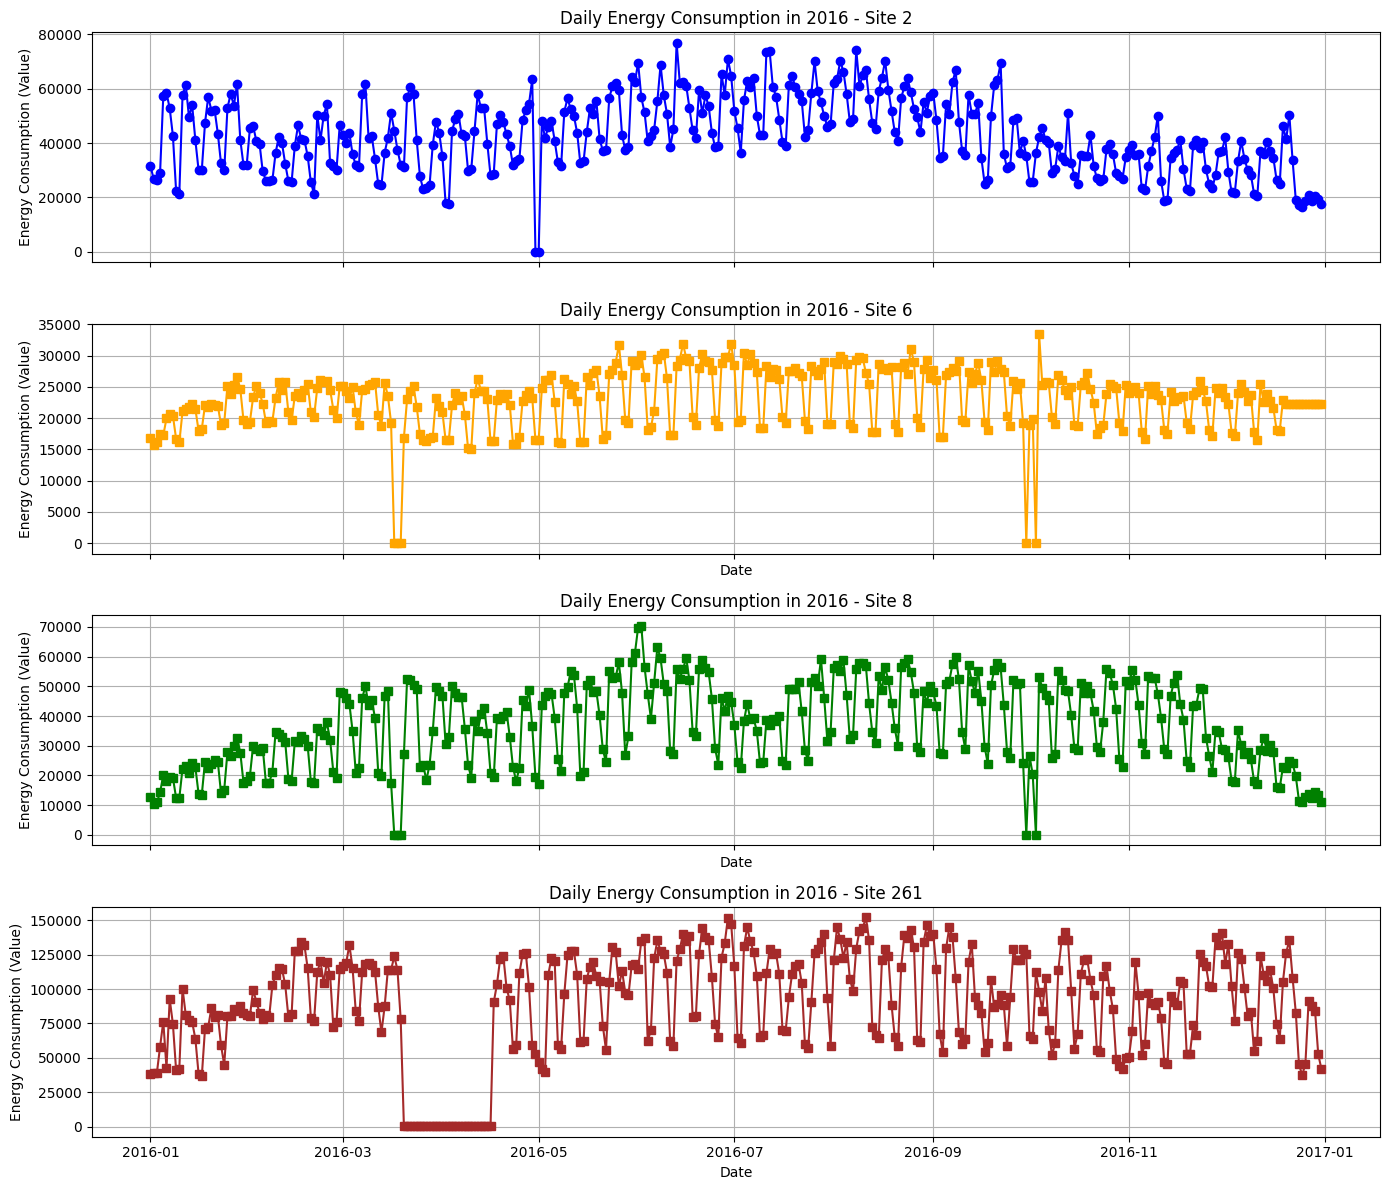

In [471]:
# Filter the data for the year 2016 for both sites
df_2016_s2 = daily_energy_df_2[daily_energy_df_2['year'] == 2016]
df_2016_s6 = daily_energy_df_6[daily_energy_df_6['year'] == 2016]
df_2016_s8 = daily_energy_df_8[daily_energy_df_8['year'] == 2016]
df_2016_s261 = daily_energy_df_261[daily_energy_df_261['year'] == 2016]

# Convert 'Date' to datetime format if it's not already
df_2016_s2['Date'] = pd.to_datetime(df_2016_s2['Date'])
df_2016_s6['Date'] = pd.to_datetime(df_2016_s6['Date'])
df_2016_s8['Date'] = pd.to_datetime(df_2016_s8['Date'])
df_2016_s261['Date'] = pd.to_datetime(df_2016_s261['Date'])

# Group by date and sum the values for each day for both sites
daily_values_s2 = df_2016_s2.groupby('Date')['Value'].sum()
daily_values_s6 = df_2016_s6.groupby('Date')['Value'].sum()
daily_values_s8 = df_2016_s8.groupby('Date')['Value'].sum()
daily_values_s261 = df_2016_s261.groupby('Date')['Value'].sum()
# Create subplots
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 12), sharex=True)

# Plotting Site 2 in the first subplot
ax1.plot(daily_values_s2.index, daily_values_s2.values, marker='o', linestyle='-', color='blue')
ax1.set_title('Daily Energy Consumption in 2016 - Site 2')
ax1.set_ylabel('Energy Consumption (Value)')
ax1.grid(True)

# Plotting Site 6 in the second subplot
ax2.plot(daily_values_s6.index, daily_values_s6.values, marker='s', linestyle='-', color='orange')
ax2.set_title('Daily Energy Consumption in 2016 - Site 6')
ax2.set_xlabel('Date')
ax2.set_ylabel('Energy Consumption (Value)')
ax2.grid(True)

# Plotting Site 8 in the second subplot
ax3.plot(daily_values_s8.index, daily_values_s8.values, marker='s', linestyle='-', color='green')
ax3.set_title('Daily Energy Consumption in 2016 - Site 8')
ax3.set_xlabel('Date')
ax3.set_ylabel('Energy Consumption (Value)')
ax3.grid(True)

# Plotting Site 261 in the second subplot
ax4.plot(daily_values_s261.index, daily_values_s261.values, marker='s', linestyle='-', color='brown')
ax4.set_title('Daily Energy Consumption in 2016 - Site 261')
ax4.set_xlabel('Date')
ax4.set_ylabel('Energy Consumption (Value)')
ax4.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


Monthly Trend of Value by Year

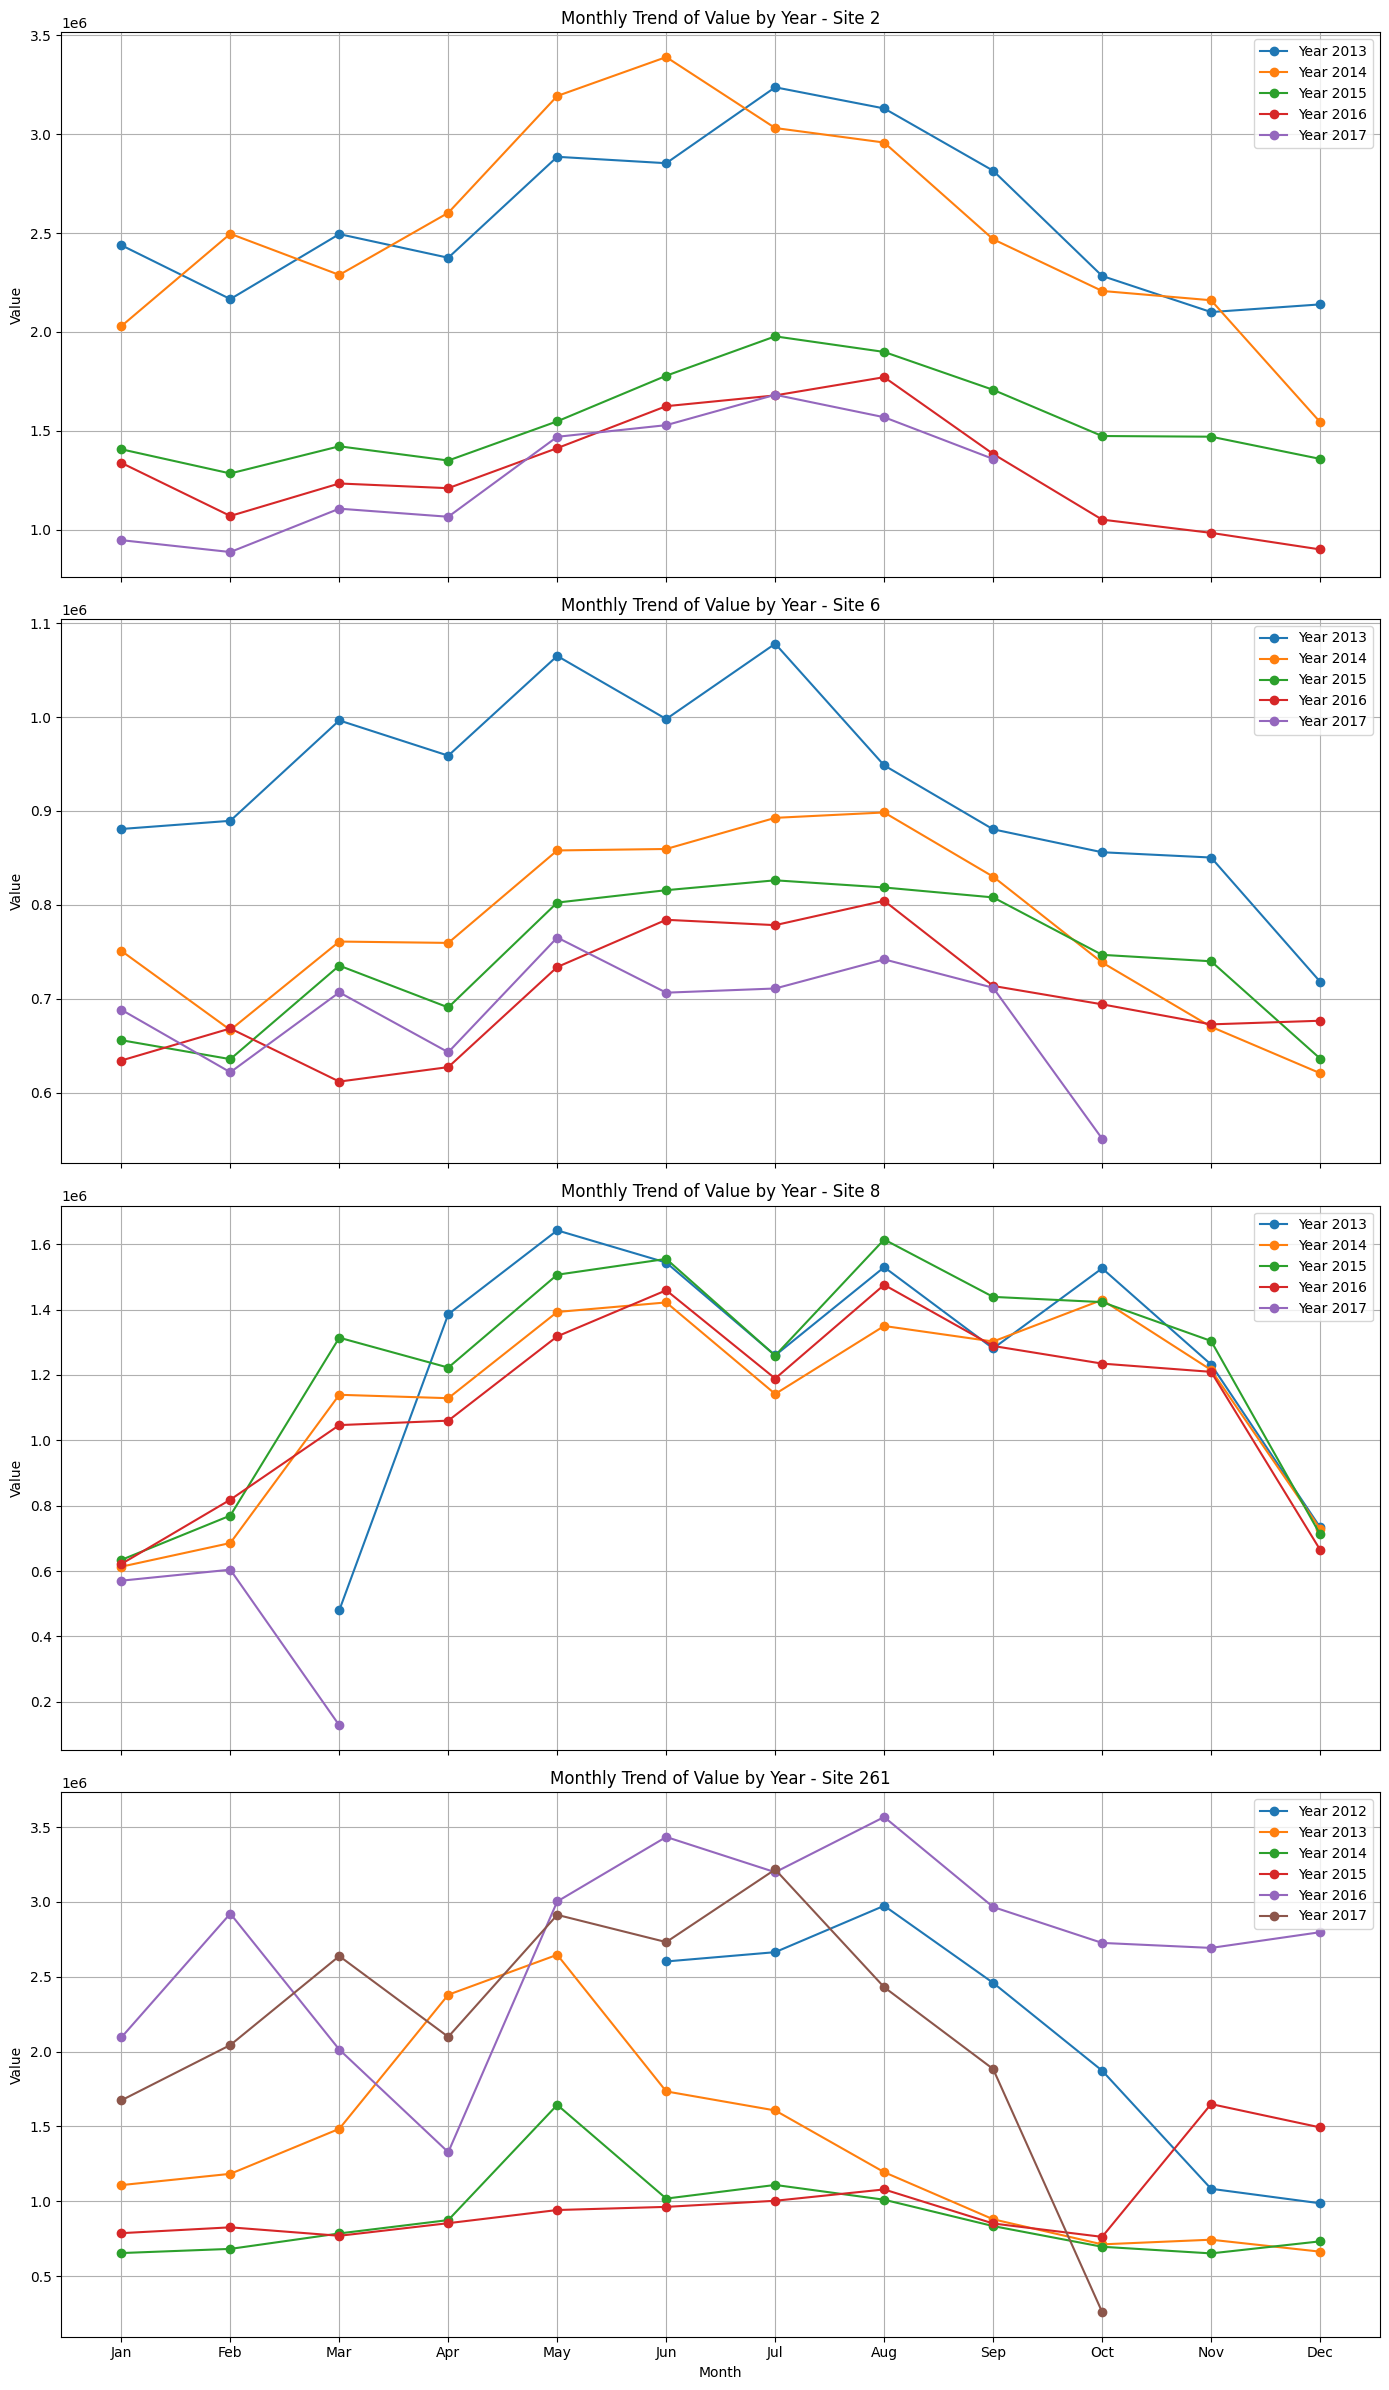

In [472]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'Timestamp' to datetime if it's not already
daily_energy_df_2['Timestamp'] = pd.to_datetime(daily_energy_df_2['Timestamp'])
daily_energy_df_6['Timestamp'] = pd.to_datetime(daily_energy_df_6['Timestamp'])
daily_energy_df_8['Timestamp'] = pd.to_datetime(daily_energy_df_8['Timestamp'])  
daily_energy_df_261['Timestamp'] = pd.to_datetime(daily_energy_df_261['Timestamp']) 

# Aggregate Value by Month within each Year for each site
monthly_trend_s2 = daily_energy_df_2.groupby(['year', 'Month'])['Value'].sum().reset_index()
monthly_trend_s6 = daily_energy_df_6.groupby(['year', 'Month'])['Value'].sum().reset_index()
monthly_trend_s8 = daily_energy_df_8.groupby(['year', 'Month'])['Value'].sum().reset_index()
monthly_trend_s261 = daily_energy_df_261.groupby(['year', 'Month'])['Value'].sum().reset_index()

# Create subplots for the four sites
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 24), sharex=True)

# Plotting Monthly Trend for Site 2
years = monthly_trend_s2['year'].unique()
for year in years:
    yearly_data = monthly_trend_s2[monthly_trend_s2['year'] == year]
    ax1.plot(yearly_data['Month'], yearly_data['Value'], marker='o', label=f'Year {year}')
ax1.set_title('Monthly Trend of Value by Year - Site 2')
ax1.set_ylabel('Value')
ax1.legend()
ax1.grid(True)

# Plotting Monthly Trend for Site 6
years = monthly_trend_s6['year'].unique()
for year in years:
    yearly_data = monthly_trend_s6[monthly_trend_s6['year'] == year]
    ax2.plot(yearly_data['Month'], yearly_data['Value'], marker='o', label=f'Year {year}')
ax2.set_title('Monthly Trend of Value by Year - Site 6')
ax2.set_ylabel('Value')
ax2.legend()
ax2.grid(True)

# Plotting Monthly Trend for Site 8
years = monthly_trend_s8['year'].unique()
for year in years:
    yearly_data = monthly_trend_s8[monthly_trend_s8['year'] == year]
    ax3.plot(yearly_data['Month'], yearly_data['Value'], marker='o', label=f'Year {year}')
ax3.set_title('Monthly Trend of Value by Year - Site 8')
ax3.set_ylabel('Value')
ax3.legend()
ax3.grid(True)

# Plotting Monthly Trend for Site 261 (Fourth Site)
years = monthly_trend_s261['year'].unique()
for year in years:
    yearly_data = monthly_trend_s261[monthly_trend_s261['year'] == year]
    ax4.plot(yearly_data['Month'], yearly_data['Value'], marker='o', label=f'Year {year}')
ax4.set_title('Monthly Trend of Value by Year - Site 261')
ax4.set_xlabel('Month')
ax4.set_ylabel('Value')
ax4.legend()
ax4.grid(True)

# Customize the x-axis labels
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


In [473]:
## Label encoding Holiday Column like working day as 1 and hoilday as 0

# Create the new column 'Is_Working_Day'
merged_df['Is_Working_Day'] = merged_df['Holiday'].apply(lambda x: 1 if x == 'Working Day' else 0)
merged_df.head()

,Timestamp,Value,Temperature,Date,Holiday,Year,Month,Day,Is_Working_Day
0,2013-01-01 00:00:00+00:00,36684.061000,21.7,2013-01-01,New year,2013,1,1,0
1,2013-01-02 00:00:00+00:00,42862.147280,20.0,2013-01-02,Berchtold's Day,2013,1,2,0
2,2013-01-03 00:00:00+00:00,34146.646910,17.0,2013-01-03,Working Day,2013,1,3,1
3,2013-01-04 00:00:00+00:00,33513.751672,17.0,2013-01-04,Working Day,2013,1,4,1
4,2013-01-05 00:00:00+00:00,37022.648021,18.5,2013-01-05,Working Day,2013,1,5,1


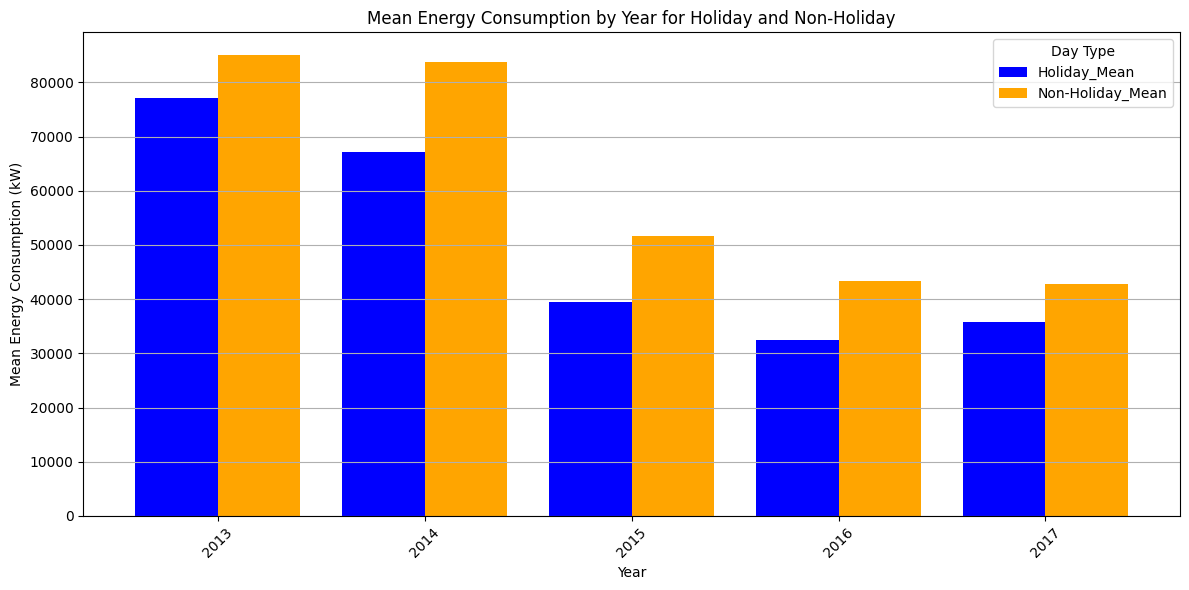

In [474]:
results = []

# Iterate over each year
for year in merged_df['Year'].unique():
    year_data = merged_df[merged_df['Year'] == year]
    
    # Get 10 holiday and 10 non-holiday entries
    holidays = year_data[year_data['Is_Working_Day'] == 0]
    non_holidays = year_data[year_data['Is_Working_Day'] == 1]
 
    holiday_mean = holidays['Value'].mean()
    non_holiday_mean = non_holidays['Value'].mean()
    
    # Append to the results list
    results.append({
        'Year': year,
        'Holiday_Mean': holiday_mean,
        'Non-Holiday_Mean': non_holiday_mean
    })

# Convert results list to DataFrame
mean_consumption_per_year = pd.DataFrame(results)

# Plotting
plt.figure(figsize=(12, 6))

# Plot holiday and non-holiday mean consumption
mean_consumption_per_year.plot(x='Year', kind='bar', width=0.8, color=['blue', 'orange'], ax=plt.gca())

# Add titles and labels
plt.title('Mean Energy Consumption by Year for Holiday and Non-Holiday')
plt.xlabel('Year')
plt.ylabel('Mean Energy Consumption (kW)')
plt.xticks(rotation=45)
plt.legend(title='Day Type')

# Show the plot
plt.grid(axis='y')
plt.tight_layout()
plt.show()


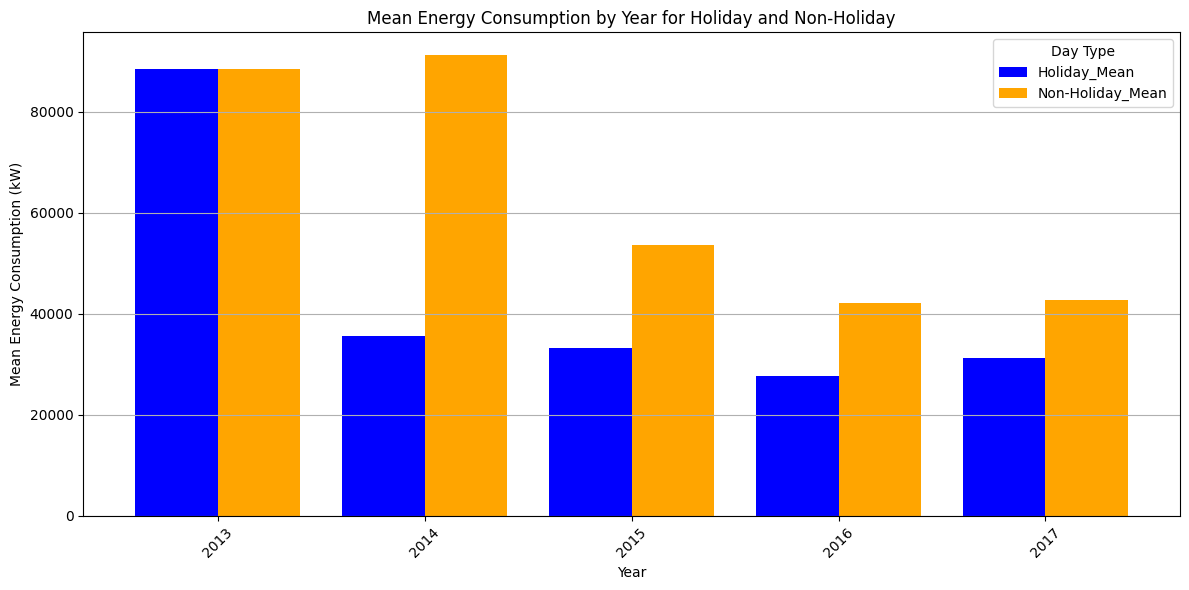

In [475]:
results = []

# Iterate over each year
for year in merged_df['Year'].unique():
    year_data = merged_df[merged_df['Year'] == year]
    
    # Get 10 holiday and 10 non-holiday entries
    holidays = year_data[year_data['Is_Working_Day'] == 0]
    non_holidays = year_data[year_data['Is_Working_Day'] == 1]
 
    holiday_median = holidays['Value'].median()
    non_holiday_median = non_holidays['Value'].median()
    
    # Append to the results list
    results.append({
        'Year': year,
        'Holiday_Mean': holiday_median,
        'Non-Holiday_Mean': non_holiday_median
    })

# Convert results list to DataFrame
median_consumption_per_year = pd.DataFrame(results)

# Plotting
plt.figure(figsize=(12, 6))

# Plot holiday and non-holiday mean consumption
median_consumption_per_year.plot(x='Year', kind='bar', width=0.8, color=['blue', 'orange'], ax=plt.gca())

# Add titles and labels
plt.title('Mean Energy Consumption by Year for Holiday and Non-Holiday')
plt.xlabel('Year')
plt.ylabel('Mean Energy Consumption (kW)')
plt.xticks(rotation=45)
plt.legend(title='Day Type')

# Show the plot
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Energy Consumption VS Temperature

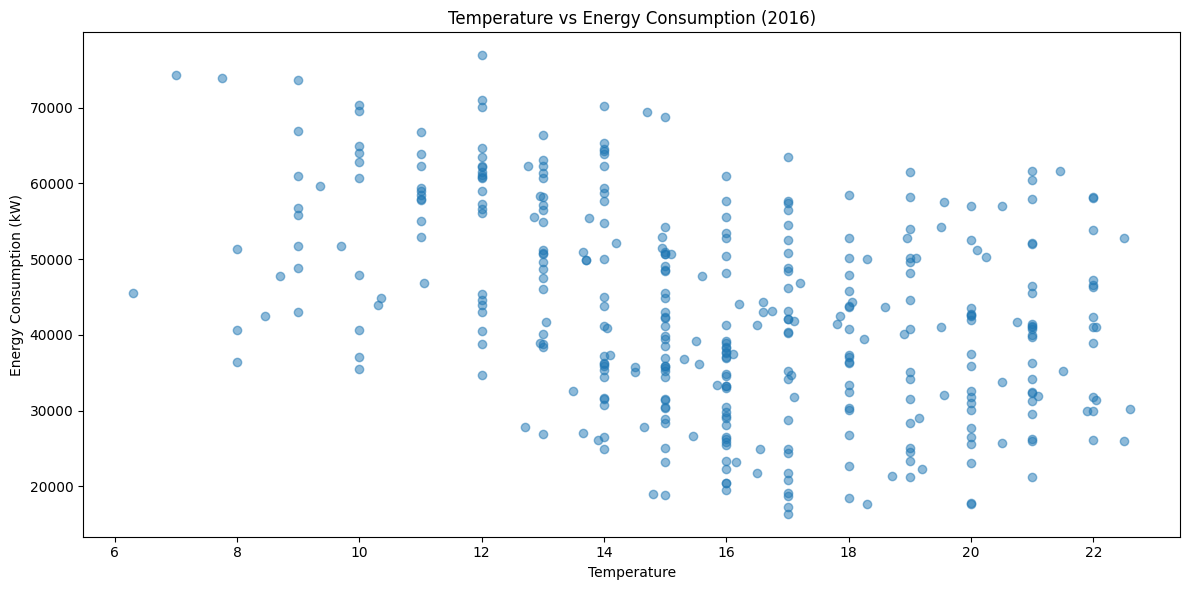

In [476]:
import matplotlib.pyplot as plt

# Filter data for the year 2016
df_2016 = merged_df[merged_df['Year'] == 2016]

plt.figure(figsize=(12, 6))

# Scatter plot for temperature vs energy consumption in 2016

plt.scatter(df_2016['Temperature'], df_2016['Value'], alpha=0.5)
plt.title('Temperature vs Energy Consumption (2016)')
plt.xlabel('Temperature')
plt.ylabel('Energy Consumption (kW)')


plt.tight_layout()
plt.show()


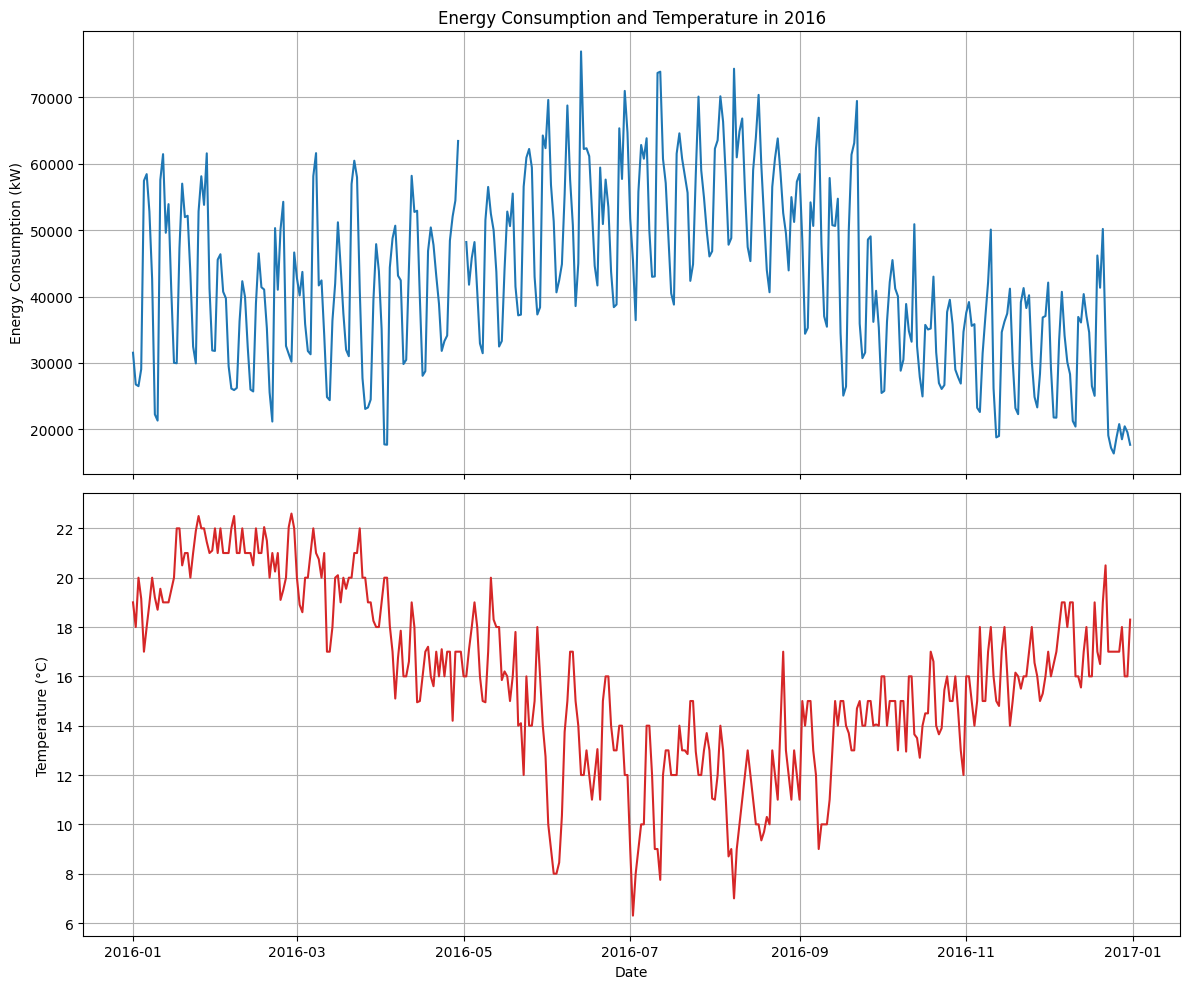

In [477]:
df_2016 = merged_df[merged_df['Year'] == 2016]

# Create a figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 10), sharex=True)

# Plot energy consumption on the first subplot
ax1.plot(df_2016['Date'], df_2016['Value'], color='tab:blue')
ax1.set_ylabel('Energy Consumption (kW)')
ax1.set_title('Energy Consumption and Temperature in 2016')
ax1.grid(True)

# Plot temperature on the second subplot
ax2.plot(df_2016['Date'], df_2016['Temperature'], color='tab:red')
ax2.set_xlabel('Date')
ax2.set_ylabel('Temperature (°C)')
ax2.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


Create a dataset for Time series Forecasting

In [478]:
merged_df.head()

,Timestamp,Value,Temperature,Date,Holiday,Year,Month,Day,Is_Working_Day
0,2013-01-01 00:00:00+00:00,36684.061000,21.7,2013-01-01,New year,2013,1,1,0
1,2013-01-02 00:00:00+00:00,42862.147280,20.0,2013-01-02,Berchtold's Day,2013,1,2,0
2,2013-01-03 00:00:00+00:00,34146.646910,17.0,2013-01-03,Working Day,2013,1,3,1
3,2013-01-04 00:00:00+00:00,33513.751672,17.0,2013-01-04,Working Day,2013,1,4,1
4,2013-01-05 00:00:00+00:00,37022.648021,18.5,2013-01-05,Working Day,2013,1,5,1


In [479]:
merged_df['Value']=merged_df['Value'].round(2)
merged_df['Temperature']=merged_df['Temperature'].round(2)

merged_df.drop(columns=['Holiday'], inplace=True)

merged_df.head()

,Timestamp,Value,Temperature,Date,Year,Month,Day,Is_Working_Day
0,2013-01-01 00:00:00+00:00,36684.06,21.7,2013-01-01,2013,1,1,0
1,2013-01-02 00:00:00+00:00,42862.15,20.0,2013-01-02,2013,1,2,0
2,2013-01-03 00:00:00+00:00,34146.65,17.0,2013-01-03,2013,1,3,1
3,2013-01-04 00:00:00+00:00,33513.75,17.0,2013-01-04,2013,1,4,1
4,2013-01-05 00:00:00+00:00,37022.65,18.5,2013-01-05,2013,1,5,1


In [480]:
merged_df.to_csv("energy_consumption_site2.csv", index=False)
